In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Linear Systems: Exercises

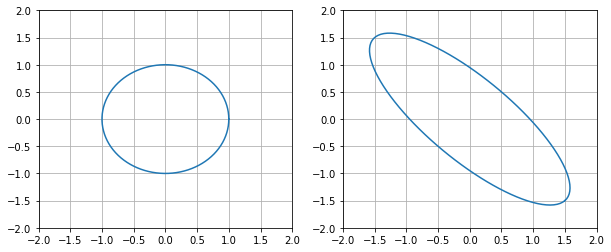

In [2]:
theta = -np.pi/4
d1 = 1.5*np.sqrt(2)
d2 = 0.5*np.sqrt(2)
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
T = np.linspace(0,2*np.pi,100)
S = np.vstack([np.cos(T),np.sin(T)])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-2,2,-2,2])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-2,2,-2,2])
plt.savefig('../img/img01.png',dpi=300)
plt.show()

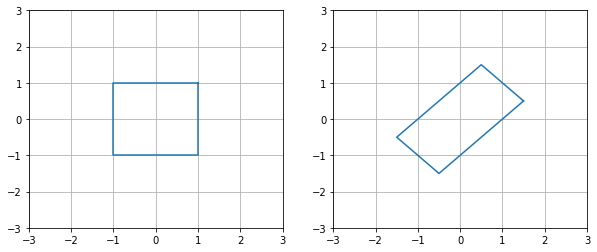

In [3]:
theta = -np.pi/4
d1 = np.sqrt(2)/2
d2 = np.sqrt(2)
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
S = np.array([[1,-1,-1,1,1],[1,1,-1,-1,1]])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-3,3,-3,3])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-3,3,-3,3])
plt.savefig('../img/img02.png',dpi=300)
plt.show()

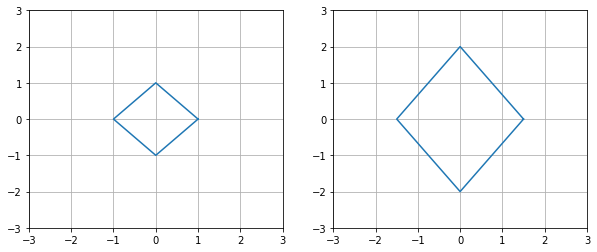

In [5]:
theta = 0
d1 = 1.5
d2 = 2
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
S = np.array([[1,0,-1,0,1],[0,1,0,-1,0]])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-3,3,-3,3])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-3,3,-3,3])
plt.savefig('../img/img03.png',dpi=300)
plt.show()

# Interpolation

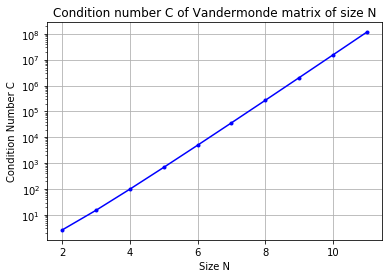

In [21]:
N = 11
Ns = np.arange(2,N+1)
Cs = []
for n in Ns:
    t = np.linspace(0,1,n)
    A = np.vander(t)
    C = np.linalg.cond(A)
    Cs.append(C)
plt.semilogy(Ns,Cs,'b.-')
plt.grid(True), plt.title('Condition number C of Vandermonde matrix of size N')
plt.xlabel('Size N'), plt.ylabel('Condition Number C')
plt.savefig('../img/01_06_img01.png',dpi=300)
plt.show()

# Cubic Spline

In [22]:
from scipy.interpolate import CubicSpline as CS

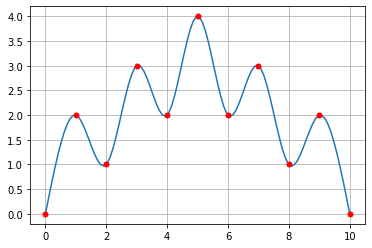

In [23]:
t = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,2,1,3,2,4,2,3,1,2,0]
p = CS(t,y,bc_type="natural")
ts = np.linspace(0,10,100)
ys = p(ts)
plt.plot(ts,ys,t,y,'r.',ms=10)
plt.grid(True)
plt.savefig('../img/01_07_img01.png',dpi=300)
plt.show()

# Finite Differences

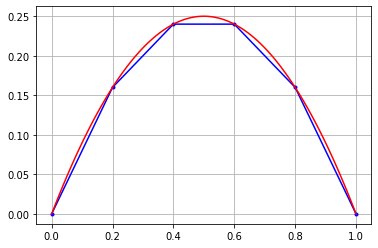

In [15]:
alpha = 0; beta = 0; N = 4;
t0 = 0; tf = 1; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = -2*np.ones(t.size)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,solution,'b.-')
T = np.linspace(t0,tf,100)
Y = T*(1 - T)
plt.plot(T,Y,'r')
plt.grid(True)
plt.savefig('../img/01_08_img01.png',dpi=300)
plt.show()

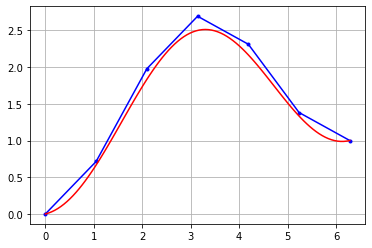

In [19]:
alpha = 0; beta = 1; N = 5;
t0 = 0; tf = 2*np.pi; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = np.cos(t)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,solution,'b.-')
T = np.linspace(t0,tf,100)
Y = 1 - np.cos(T) + T/2/np.pi
plt.plot(T,Y,'r')
plt.grid(True)
plt.savefig('../img/01_08_img02.png',dpi=300)
plt.show()

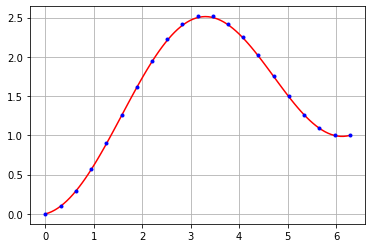

In [24]:
alpha = 0; beta = 1; N = 19;
t0 = 0; tf = 2*np.pi; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = np.cos(t)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
T = np.linspace(t0,tf,100)
Y = 1 - np.cos(T) + T/2/np.pi
plt.plot(T,Y,'r')
plt.plot(t,solution,'b.')
plt.grid(True)
plt.savefig('../img/01_08_img03.png',dpi=300)
plt.show()

$$
y'' + p(t)y' + q(t)y = r(t)
$$

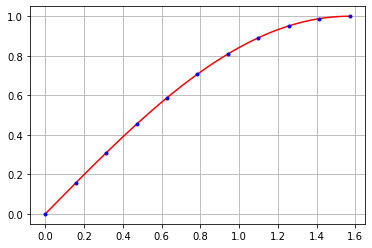

In [34]:
alpha = 0; beta = 1; N = 9;
t0 = 0; tf = np.pi/2; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)

p = np.zeros(t.size)
q = np.ones(t.size)
r = np.zeros(t.size)

a = 1 - h*p/2
b = h**2*q - 2
c = 1 + h*p/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*r[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

solution = np.concatenate([alpha,y,beta],axis=None)
T = np.linspace(t0,tf,100)
Y = np.sin(T)
plt.plot(T,Y,'r')
plt.plot(t,solution,'b.')
plt.grid(True)
plt.show()

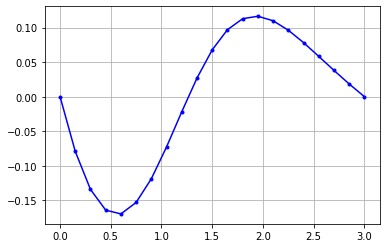

In [65]:
alpha = 0; beta = 0; N = 19;
t0 = 0; tf = 3; h = (tf - t0)/(N + 1);
ts = np.linspace(t0,tf,N+2)

p = lambda t: t**2
ps = p(ts)
q = lambda t: np.ones(t.size)
qs = q(ts)
r = lambda t: np.cos(t)
rs = r(ts)

a = 1 - h*ps/2
b = h**2*qs - 2
c = 1 + h*ps/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*rs[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(ts,solution,'b.-')
plt.grid(True)
plt.savefig('../img/01_08_img04.png',dpi=300)
plt.show()

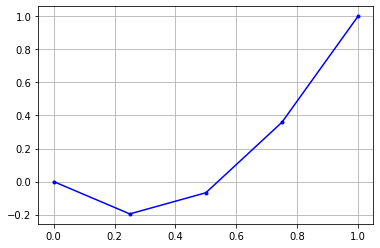

In [88]:
alpha = 0; beta = 1; N = 3;
t0 = 0; tf = 1; h = (tf - t0)/(N + 1);
ts = np.linspace(t0,tf,N+2)

p = lambda t: np.zeros(t.size)
ps = p(ts)
q = lambda t: np.ones(t.size)
qs = q(ts)
r = lambda t: 5/(1 + t**4)
rs = r(ts)

a = 1 - h*ps/2
b = h**2*qs - 2
c = 1 + h*ps/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*rs[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(ts,solution,'b.-')
plt.grid(True)
plt.show()

# PCA

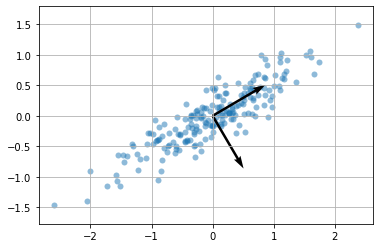

In [38]:
N = 200
x = np.random.randn(N)
y = 0.2*np.random.randn(N)
X = np.column_stack((x,y))
X = X - X.mean(axis=0)
theta = np.pi/6
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
X = X@R
P,S,QT = la.svd(X)
plt.scatter(X[:,0],X[:,1],alpha=0.5,lw=0)
plt.quiver(QT[0,0],QT[0,1],angles='xy',scale_units='xy',scale=1)
plt.quiver(QT[1,0],QT[1,1],angles='xy',scale_units='xy',scale=1)
plt.grid(True); plt.axis('equal');
plt.savefig('../img/03_04_img01.png',dpi=300)
plt.show()

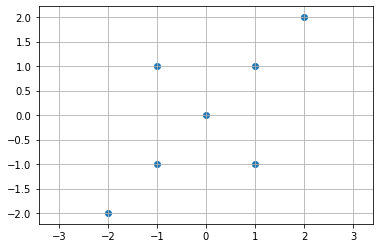

In [46]:
x = [-2,-1,-1,0,1,1,2]
y = [-2,-1,1,0,-1,1,2]
X = np.column_stack((x,y))
plt.figure(figsize=())
plt.scatter(X[:,0],X[:,1],lw=0,s=50)
plt.grid(True); plt.axis('equal');
plt.savefig('../img/03_04_img02.png',dpi=300)
plt.show()

In [44]:
from sklearn import datasets

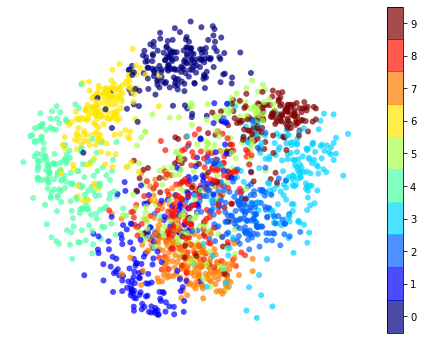

In [95]:
digits = datasets.load_digits()
D = digits['data']
X = D - D.mean(axis=0)
P,S,QT = la.svd(X)
X2d = X @ QT[0:2,:].T
plt.figure(figsize=(8,6))
plt.scatter(X2d[:,0],-X2d[:,1],c=digits['target'],cmap=plt.cm.get_cmap('jet', 10),alpha=0.7,lw=0)
plt.axis(False)
plt.colorbar(ticks=range(0,10)); plt.clim([-0.5,9.5]);
plt.savefig('../img/03_04_img05.png',dpi=300)
plt.show()

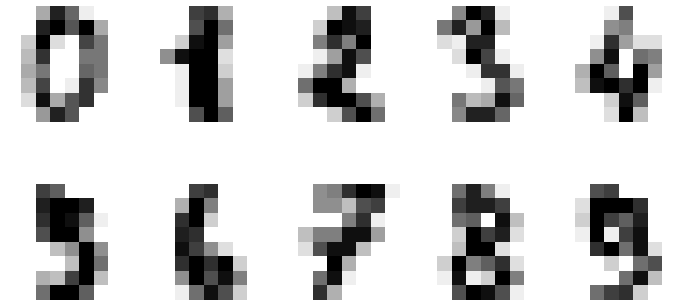

In [91]:
plt.figure(figsize=(12,6))
for n in range(0,10):
    plt.subplot(2,5,n+1)
    plt.imshow(D[n,:].reshape(8,8),cmap='binary')
    plt.axis(False)
plt.savefig('../img/03_04_img03.png',dpi=300)
plt.show()

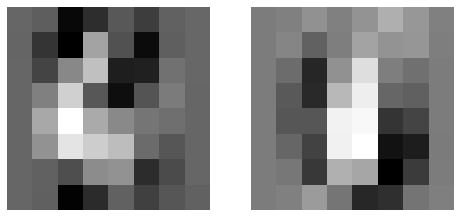

In [92]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(QT[0,:].reshape(8,8),cmap='binary')
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(-QT[1,:].reshape(8,8),cmap='binary')
plt.axis(False)
plt.savefig('../img/03_04_img04.png',dpi=300)
plt.show()

## Eigenvalue: EXERCISES

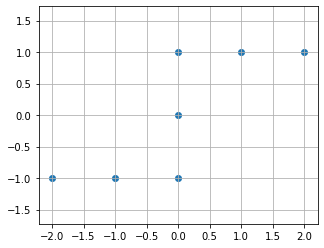

In [201]:
x = [-2,-1,0,0,0,1,2]
y = [-1,-1,1,0,-1,1,1]
X = np.column_stack((x,y))
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],lw=0,s=50)
plt.grid(True); plt.axis('equal');
plt.savefig('../img/03_04_ex01.png',dpi=300)
plt.show()

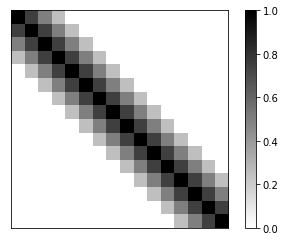

In [152]:
N = 16
c = np.zeros(N)
c[:4] = np.array([1.0,0.75,0.5,0.25])
A = la.toeplitz(c)
plt.imshow(A,cmap='binary')
plt.xticks([]); plt.yticks([]); plt.colorbar()
plt.savefig('../img/03_04_img06.png',dpi=300)
plt.show()

In [121]:
P,S,QT = la.svd(A)

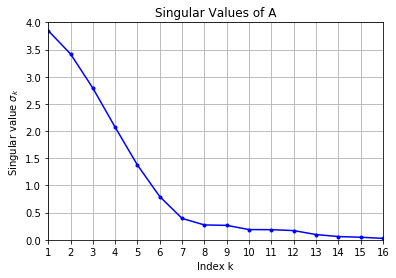

In [148]:
plt.plot(range(1,17),S,'b.-')
plt.grid(True); plt.xlim([1,16]); plt.ylim([0,4])
plt.title("Singular Values of A"); plt.xticks(range(1,17))
plt.xlabel('Index k'); plt.ylabel('Singular value $\sigma_k$');

plt.savefig('../img/03_04_img07.png',dpi=300)
plt.show()

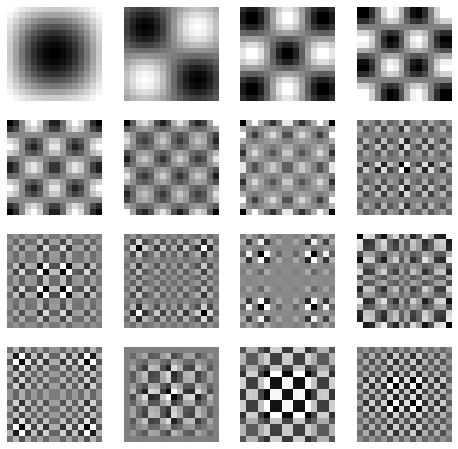

In [149]:
plt.figure(figsize=(8,8))
for n in range(0,16):
    plt.subplot(4,4,n+1)
    plt.imshow(S[n]*np.outer(P[:,n],QT[n,:]),cmap='binary')
    plt.axis(False)
plt.savefig('../img/03_04_img08.png',dpi=300)
plt.show()

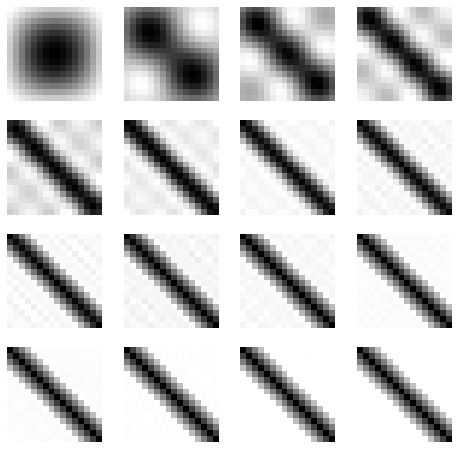

In [156]:
plt.figure(figsize=(8,8))
for n in range(0,16):
    plt.subplot(4,4,n+1)
    Ak = sum([S[n]*np.outer(P[:,n],QT[n,:]) for n in range(0,n+1)])
    plt.imshow(Ak,cmap='binary')
    plt.axis(False)
plt.savefig('../img/03_04_img09.png',dpi=300)
plt.show()

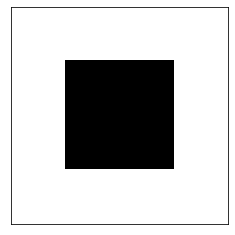

In [210]:
N = 4
Z = np.zeros((N,N))
O = np.ones((N,N))
X = np.block([[Z,Z,Z,Z],[Z,O,O,Z],[Z,O,O,Z],[Z,Z,Z,Z]])
plt.imshow(X,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('../img/03_04_img10.png',dpi=300)
plt.show()

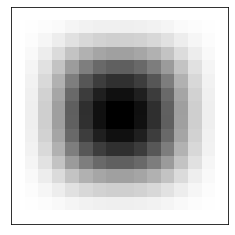

In [211]:
B = A @ X @ A + 0.01*np.random.random((16,16))
plt.imshow(B,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('../img/03_04_img11.png',dpi=300)
plt.show()

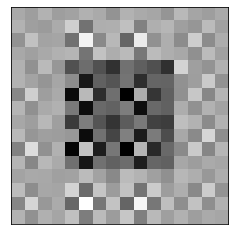

In [212]:
X1 = la.solve(A,B)
X2 = la.solve(A,X1.T)
plt.imshow(X2,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('../img/03_04_img12.png',dpi=300)
plt.show()

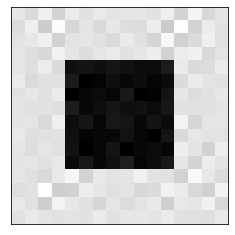

In [213]:
k = 12
Ak_plus = sum([1/S[n]*np.outer(QT[n,:].T,P[:,n].T) for n in range(0,k+1)])
X3 = Ak_plus @ B @ Ak_plus
plt.imshow(X3,cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('../img/03_04_img13.png',dpi=300)
plt.show()

## DFT Exercises

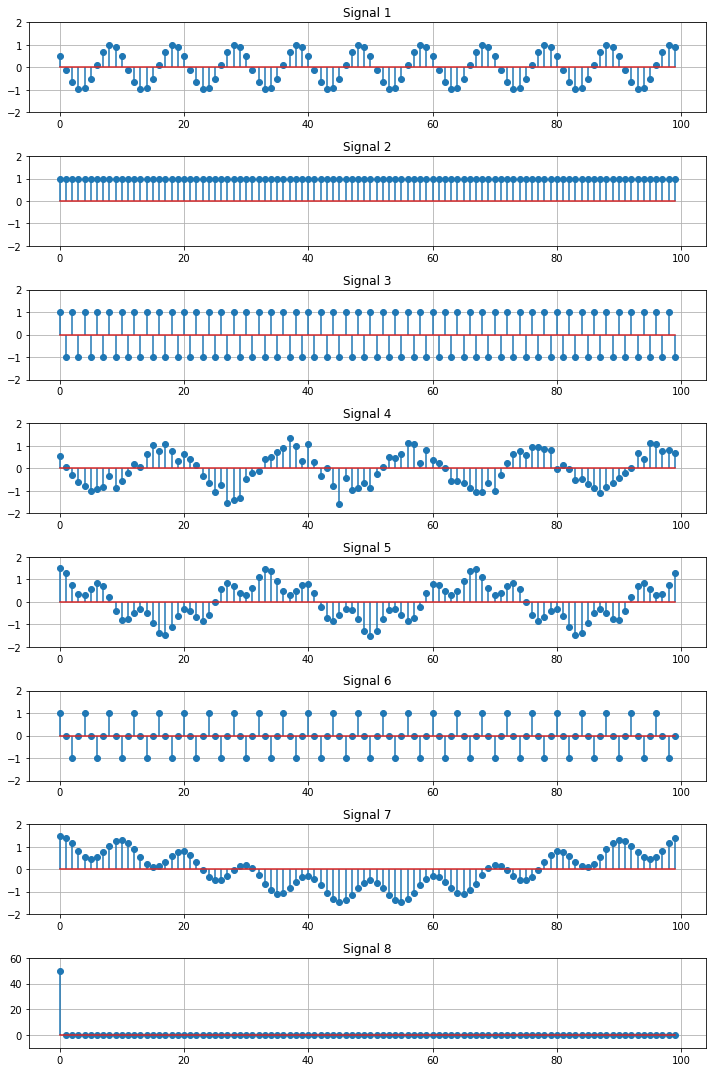

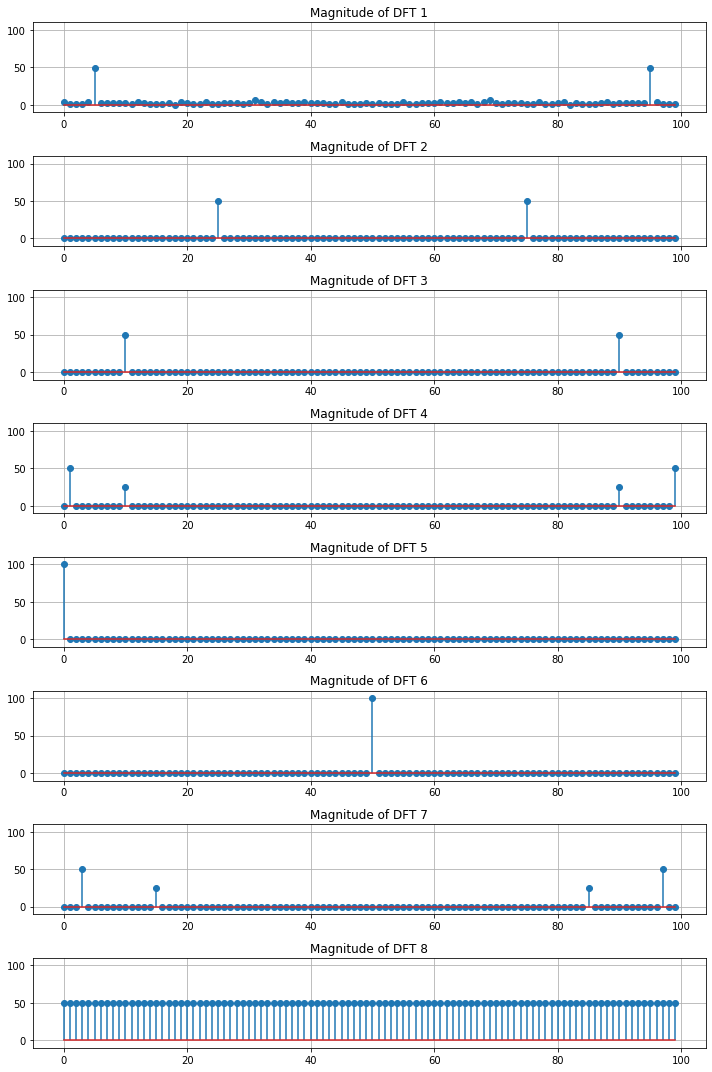

In [18]:
N = 100
n = np.arange(0,N)
t = n/N

signals = [[(1,10,np.pi/3)],
           [(1,0,0)],
           [(1,50,0)],
           [(1,5,np.pi/3)],
           [(1,3,0),(1/2,15,0)],
           [(1,25,0)],
           [(1,1,0),(1/2,10,0)]]
n_signals = len(signals) + 1
noises = np.zeros(n_signals); noises[3] = 0.25
X = np.zeros((n_signals,N))
Y = np.zeros((n_signals,N),dtype=np.complex_)
for n,signal in enumerate(signals):
    if noises[n] > 0:
        noise = noises[n]*np.random.randn(N)
    else:
        noise = 0.0
    X[n,:] = sum([s[0]*np.cos(2*np.pi*s[1]*t + s[2]) for s in signal]) + noise
    Y[n,:] = np.fft.fft(X[n,:])
X[-1,0] = 50.0
Y[-1,:] = np.fft.fft(X[-1,:])

plt.figure(figsize=(10,15))
for n in range(n_signals):
    plt.subplot(n_signals,1,n + 1)
    plt.stem(X[n,:],use_line_collection=True)
    plt.title('Signal ' + str(n+1)); plt.grid(True); plt.ylim([-2,2])
plt.ylim([-10,60])
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig('../img/04_ex01a.png',dpi=300)
plt.show()

plt.figure(figsize=(10,15))
for i,n in enumerate(np.random.permutation(n_signals)):
    plt.subplot(n_signals,1,i + 1)
    plt.stem(np.abs(Y[n,:]),use_line_collection=True)
    plt.title('Magnitude of DFT ' + str(i+1)); plt.grid(True); plt.ylim([-10,N+10])
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig('../img/04_ex01b.png',dpi=300)
plt.show()

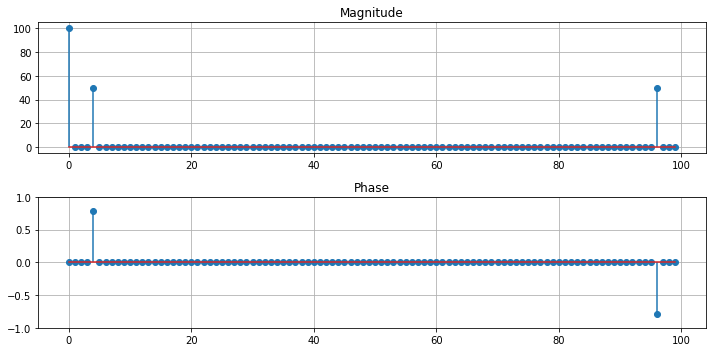

In [52]:
N = 100
n = np.arange(0,N)
t = n/N

x = 1 + np.cos(2*np.pi*4*t + np.pi/4)
y = np.fft.fft(x)

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.stem(np.abs(y),use_line_collection=True)
plt.title('Magnitude'); plt.grid(True); plt.tight_layout()
plt.subplot(2,1,2)
y_angle = np.angle(y)
y_angle[np.abs(y) < 1e-12] = 0.0
plt.stem(y_angle,use_line_collection=True)
plt.title('Phase'); plt.grid(True); plt.ylim([-1,1])
plt.tight_layout()
plt.savefig('../img/04_ex02.png',dpi=300)
plt.show()
#plt.stem(x,use_line_collection=True)
#plt.grid(True); plt.tight_layout()
plt.show()

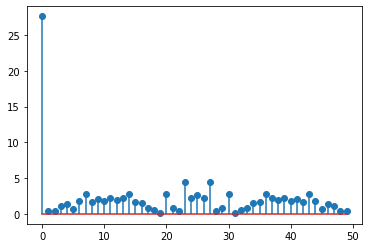

In [49]:
N = 50
x = np.random.rand(N)
y = np.fft.fft(x)
plt.stem(np.abs(y),use_line_collection=True)
plt.show()